VALIAU Virgile

DESCARPENTRIES Rémy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

In [2]:
C1 = 1
C2 = 4
C3 = 0
Q = 5*10**-3
R = 5

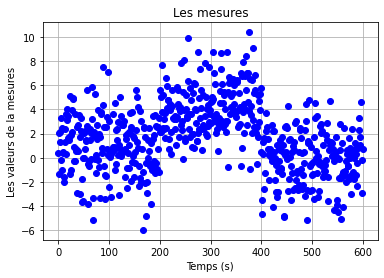

In [3]:
z1 = norm.rvs(loc = C1, scale = np.sqrt(R), size = 200)
z2 = norm.rvs(loc = C2, scale = np.sqrt(R), size = 200)
z3 = norm.rvs(loc = C3, scale = np.sqrt(R), size = 200)
z = np.concatenate((z1, z2, z3))
t = np.arange(0, len(z), 1)
plt.plot(t, z, 'bo')
plt.title('Les mesures')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs de la mesures')
plt.grid()
plt.show()

In [4]:
xh = np.zeros(shape = len(z))
x0 = norm.rvs(loc = 0, scale = np.sqrt(2), size = 1)
P = np.zeros(shape = len(z))
P0 = 1
xh[0] = x0
P[0] = P0 + Q

In [5]:
for p in range(0, len(z), 1):
    K = P[p] / (P[p] + R)
    xh[p] = xh[p] + K * (z[p] - xh[p])
    P[p] = P[p] - K * P[p]
    if p < len(z) - 1:
        xh[p + 1] = xh[p]
        P[p + 1] = P[p] + Q

        

plt.show()

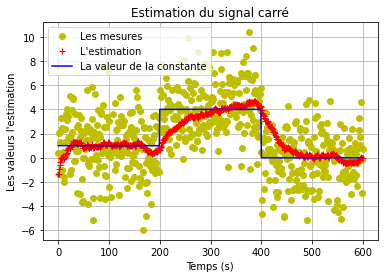

In [6]:
un = np.concatenate((np.full(shape = len(z1), fill_value = C1), np.full(shape = len(z2), fill_value = C2), np.full(shape = len(z3), fill_value = C3)))
plt.plot(t, z, 'yo', label = 'Les mesures')
plt.plot(t, xh, 'r+', label = 'L\'estimation')
plt.plot(t, un, 'b', label = 'La valeur de la constante')
plt.title('Estimation du signal carré')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'estimation')
plt.legend()
plt.grid()
plt.show()

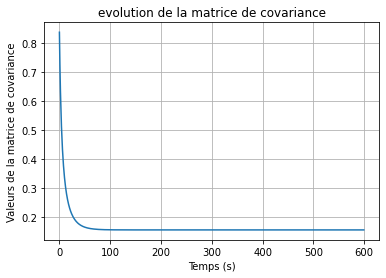

In [7]:
plt.plot(t, P)
plt.title('evolution de la matrice de covariance')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de la matrice de covariance')
plt.grid()
plt.show()

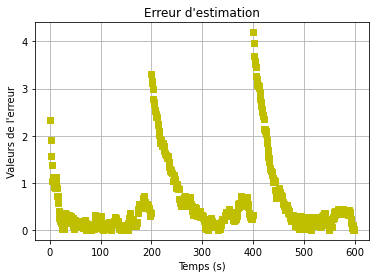

In [8]:
plt.plot(t, abs(un - xh), 'ys')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.grid()
plt.show()